In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Reading image (assuming the image is located in the same directory as the script)
img = cv2.imread('/content/shape.png')

# Converting image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Setting threshold of gray image
_, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Finding contours
contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Skipping the first contour (entire image)
i = 1

# List for storing names of shapes (optional, for clarity)
# shape_names = []

for contour in contours:

    # Approximating the shape with polygons
    approx = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True)

    # Drawing contours (optional, for visualization)
    cv2.drawContours(img, [contour], 0, (0, 0, 255), 5)

    # Finding center point of shape
    M = cv2.moments(contour)
    if M['m00'] != 0.0:
        x = int(M['m10'] / M['m00'])
        y = int(M['m01'] / M['m00'])


        if len(approx) == 3:
            cv2.putText(img, 'Triangle', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
        elif len(approx) == 4:
            cv2.putText(img, 'Square', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
        elif len(approx) == 5:
            cv2.putText(img, 'Pentagon', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
        elif len(approx) == 6:
            cv2.putText(img, 'Hexagon', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
        else:
            cv2.putText(img, 'Circle', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)





In [ ]:
from google.colab.patches import cv2_imshow


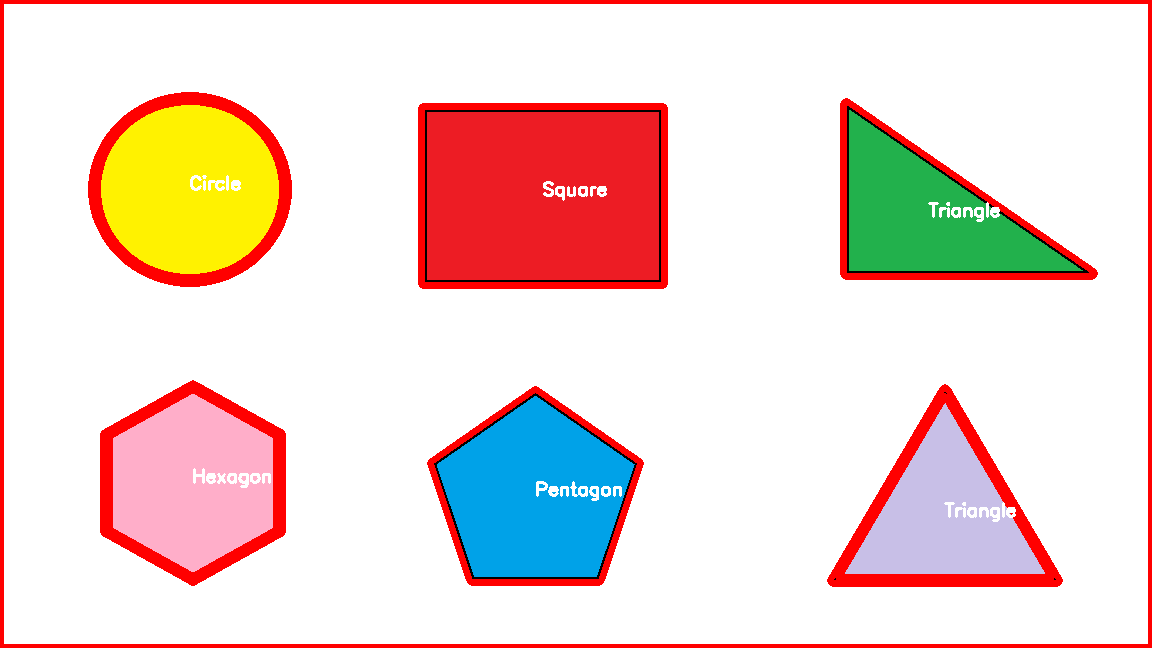

In [ ]:
# displaying the image after drawing contours
cv2_imshow(img)

cv2.waitKey(0)
cv2.destroyAllWindows()